# Assignment #5

## Due: November 17, 2020

Read in the [Volcano eruptions](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv) data from the TidyTuesday project with `read_csv`.

Use the `print` function to find the number of rows and columns in the data.

In [1]:
library("tidyverse")

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [10]:
volcano<- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv",
                  col_types=
                            cols(
                              volcano_number = col_double(),
                              volcano_name = col_character(),
                              eruption_number = col_double(),
                              eruption_category = col_character(),
                              area_of_activity = col_character(),
                              vei = col_double(),
                              start_year = col_double(),
                              start_month = col_double(),
                              start_day = col_double(),
                              evidence_method_dating = col_character(),
                              end_year = col_double(),
                              end_month = col_double(),
                              end_day = col_double(),
                              latitude = col_double(),
                              longitude = col_double()
                            ))

volcano%>%as.tibble()%>%print

# A tibble: 11,178 x 15
   volcano_number volcano_name eruption_number eruption_catego… area_of_activity
            <dbl> <chr>                  <dbl> <chr>            <chr>           
 1         266030 Soputan                22354 Confirmed Erupt… NA              
 2         343100 San Miguel             22355 Confirmed Erupt… NA              
 3         233020 Fournaise, …           22343 Confirmed Erupt… NA              
 4         345020 Rincon de l…           22346 Confirmed Erupt… NA              
 5         353010 Fernandina             22347 Confirmed Erupt… NA              
 6         273070 Taal                   22344 Confirmed Erupt… NA              
 7         282050 Kuchinoerab…           22345 Confirmed Erupt… NA              
 8         241040 Whakaari/Wh…           22338 Confirmed Erupt… 1978/90 Crater …
 9         311060 Semisopochn…           22341 Confirmed Erupt… NA              
10         284096 Nishinoshima           22340 Confirmed Erupt… NA              
# … 

Using `group_by`, `summarize` (or `count`), and `arrange`, find the volcano with the most recorded eruptions in the data. Remeber the [desc](https://dplyr.tidyverse.org/reference/desc.html) function can be used to sort in descending order.

In [13]:
unique(volcano[c("eruption_category")])

eruption_category
<chr>
Confirmed Eruption
Uncertain Eruption
Discredited Eruption


In [30]:
volcano%>%
        group_by(volcano_name)%>%
        count(eruption_category) %>%
        arrange(desc(n))%>%
        head(1)

volcano_name,eruption_category,n
<chr>,<chr>,<int>
Etna,Confirmed Eruption,196


Using `filter` and `arrange`, what is the year of the most recent eruption for the volcano above (i.e. the volcano with the most recorded eruptions in the data)? 

In [29]:
volcano%>%
        select(volcano_name,start_year)%>%
        filter(volcano_name=="Etna")%>%
        arrange(desc(start_year))%>%
        head(1)

volcano_name,start_year
<chr>,<dbl>
Etna,2013


Make a bar chart of eruption count by volcano_name. The bars should be sorted by frequency using `fct_infreq`. "Lump" the low frequency values into an "Other" category with `fct_lump`.

**Bonus:** Can you remove the "Other" category with the `filter` function if it dominates the chart?

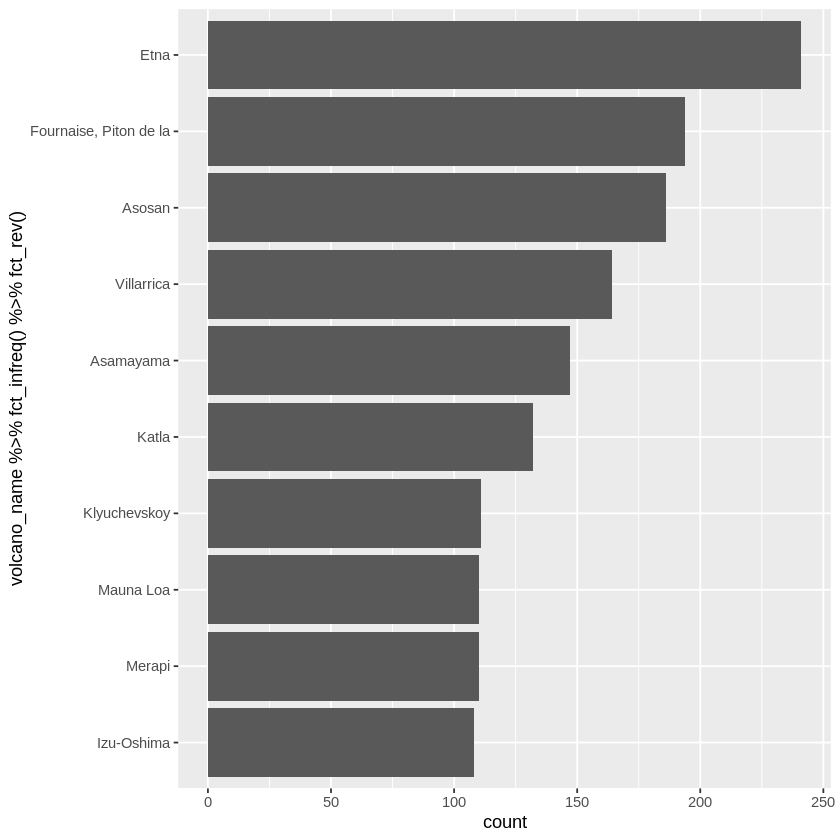

In [39]:
df<-volcano %>%
    mutate(volcano_name = volcano_name %>% fct_lump(n = 10)) %>%
    filter(volcano_name != "Other")
p=ggplot(df, aes(x=volcano_name%>% fct_infreq() %>% fct_rev()))+geom_bar()
p+  coord_flip()

Using `mutate` generate a column that represents the span of each eruption in years (i.e. "end_year" minus "start_year"). Use `filter` to exclude eruption spans shorter than ten years. 

- Plot a histogram of your generated column (i.e. eruption spans greater than ten years).
- Which volcano(s) has/have the longest eruption span in years? How long did the eruption last?

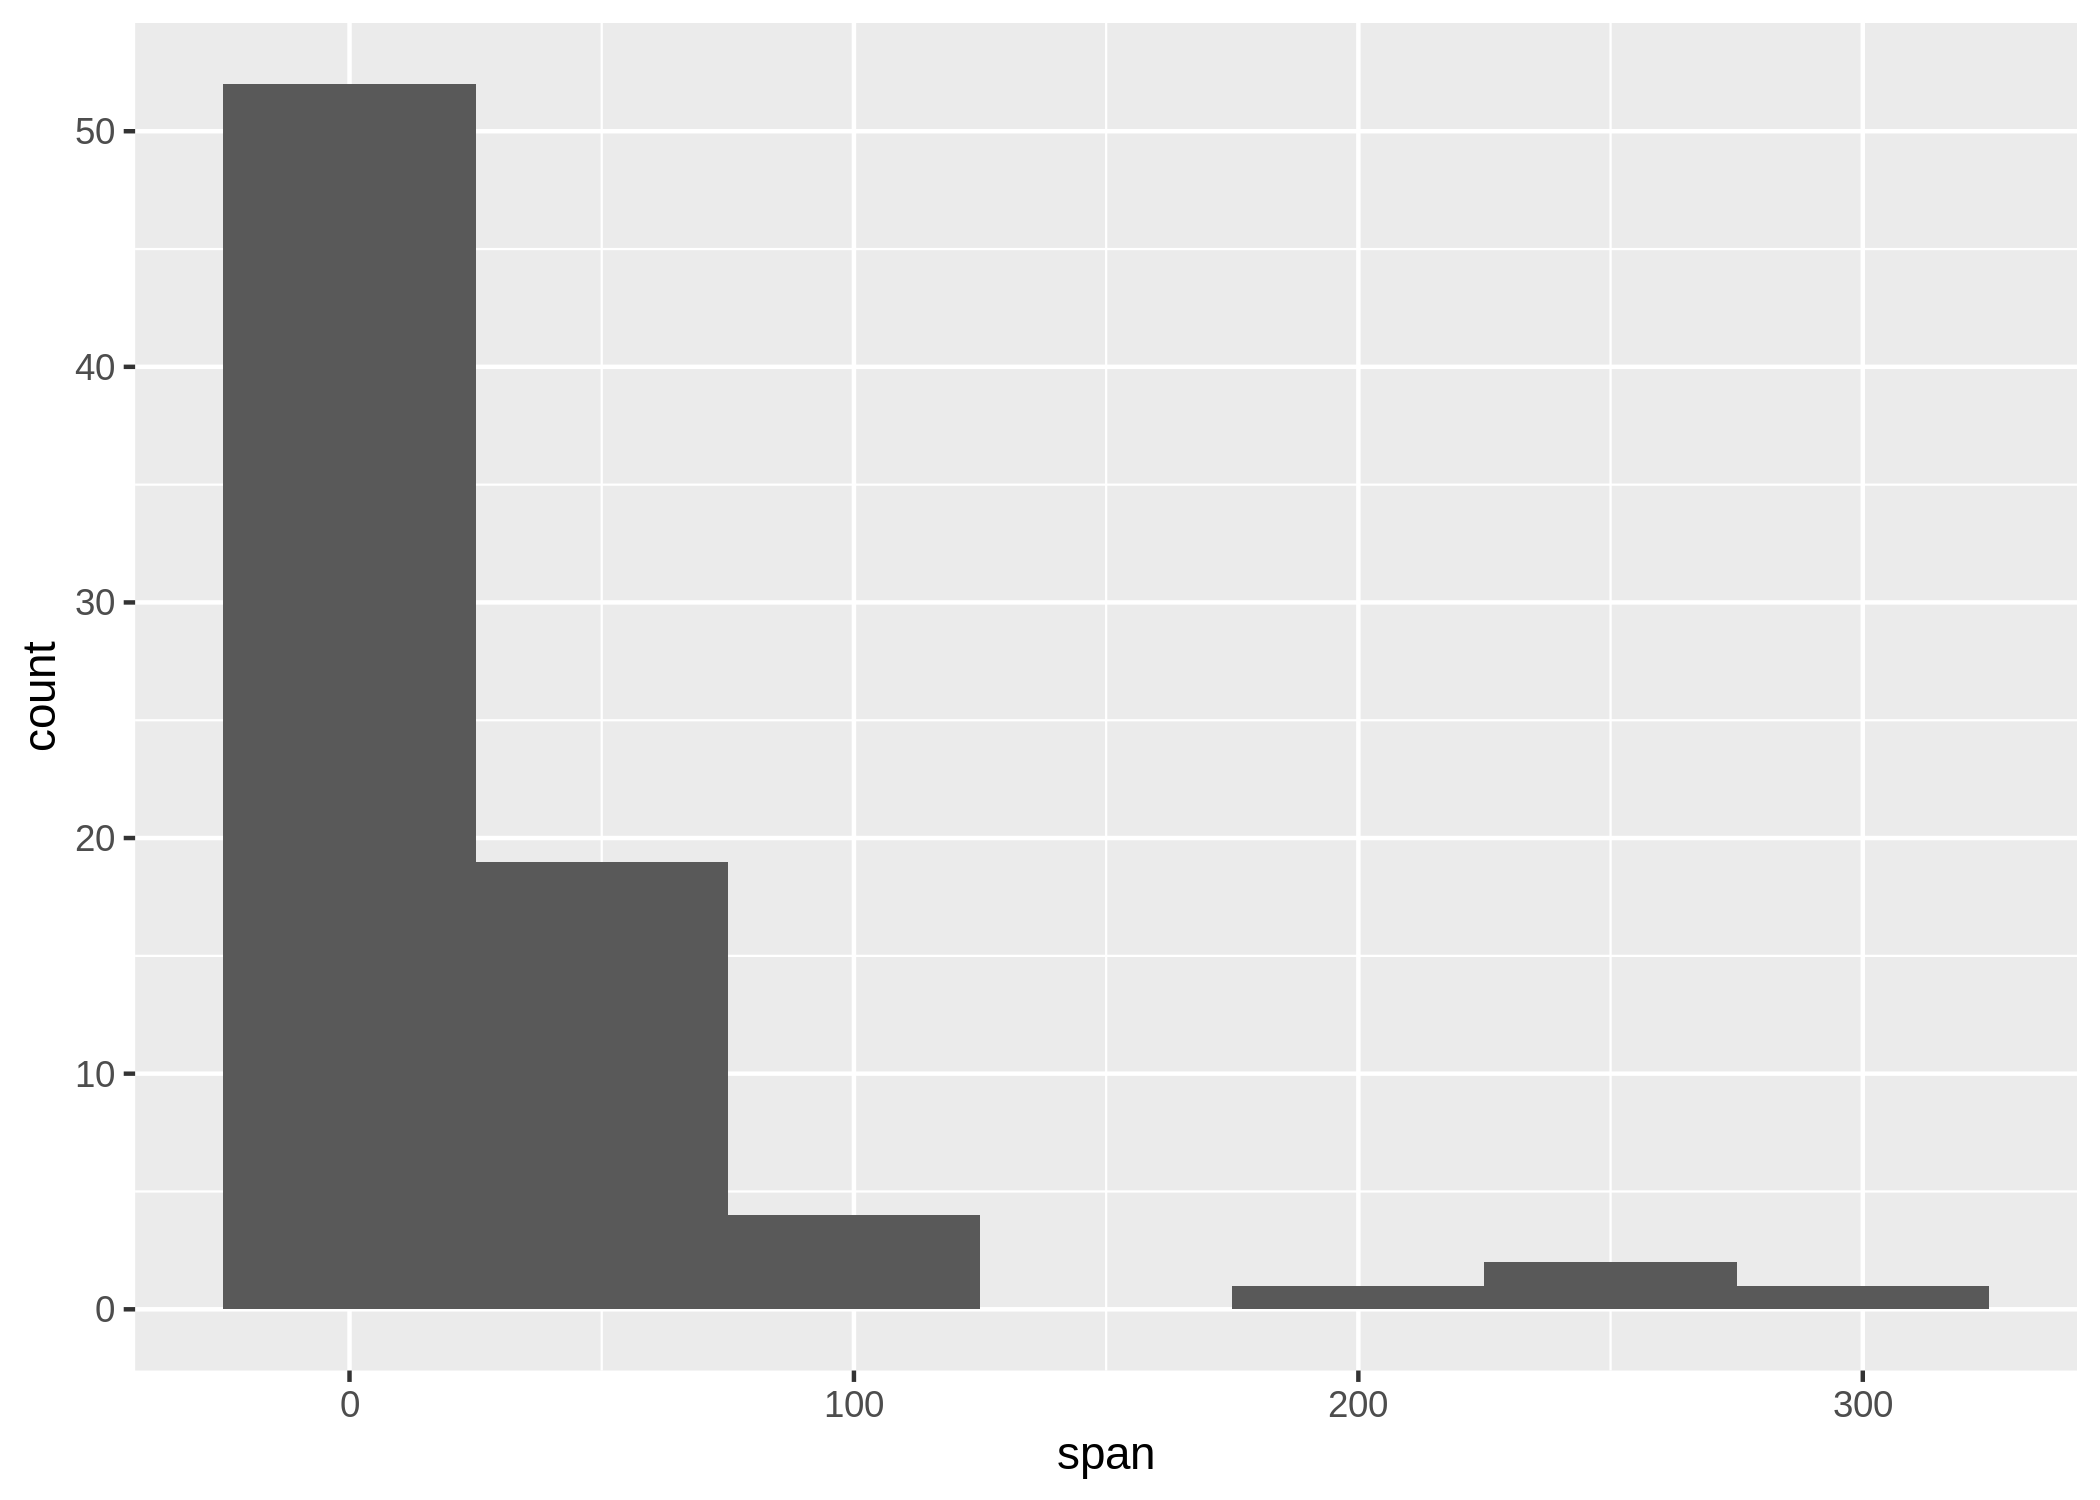

In [50]:
options(repr.plot.width=7,repr.plot.height=5,repr.plot.res=300)
df2<- volcano%>%
        mutate(span=end_year-start_year)%>%
        filter(span>10)
q=ggplot(df2, aes(x=span))+geom_histogram(binwidth=50)
q

In [52]:
df2%>%select(volcano_name,start_year,end_year,span)%>%arrange(desc(span))%>%head(1)

volcano_name,start_year,end_year,span
<chr>,<dbl>,<dbl>,<dbl>
Stromboli,1558,1857,299
